# Pima Indians Diabetes Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv("./data/diabetes.csv")
print(df.head())
cols = df.columns.values
x_cols = cols[:-1]

   Glucose  Insulin  Age  Outcome
0       85        0   31        0
1       89       94   21        0
2      116        0   30        0
3      115        0   29        0
4      110        0   30        0


In [5]:
df = df[df['Insulin'] != 0]
df = df[df['Glucose'] != 0]
df.head()

,Glucose,Insulin,Age,Outcome
1,89,94,21,0
6,103,83,33,0
7,126,235,27,0
9,97,140,22,0
10,145,110,57,0


### First lets segregate the outcomes

In [6]:
df_diabetes = df[df['Outcome'] == 1]
df_nondiabetes = df[df['Outcome'] == 0]

### Lets plot!

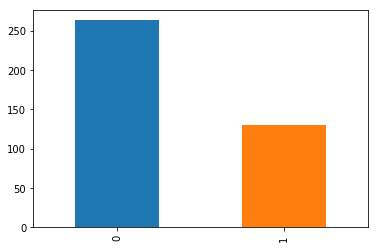

In [7]:
df['Outcome'].value_counts().plot(kind='bar')

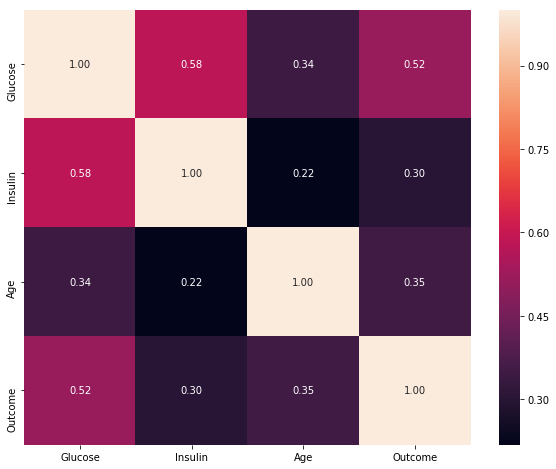

In [8]:
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot=True, fmt='.2f')

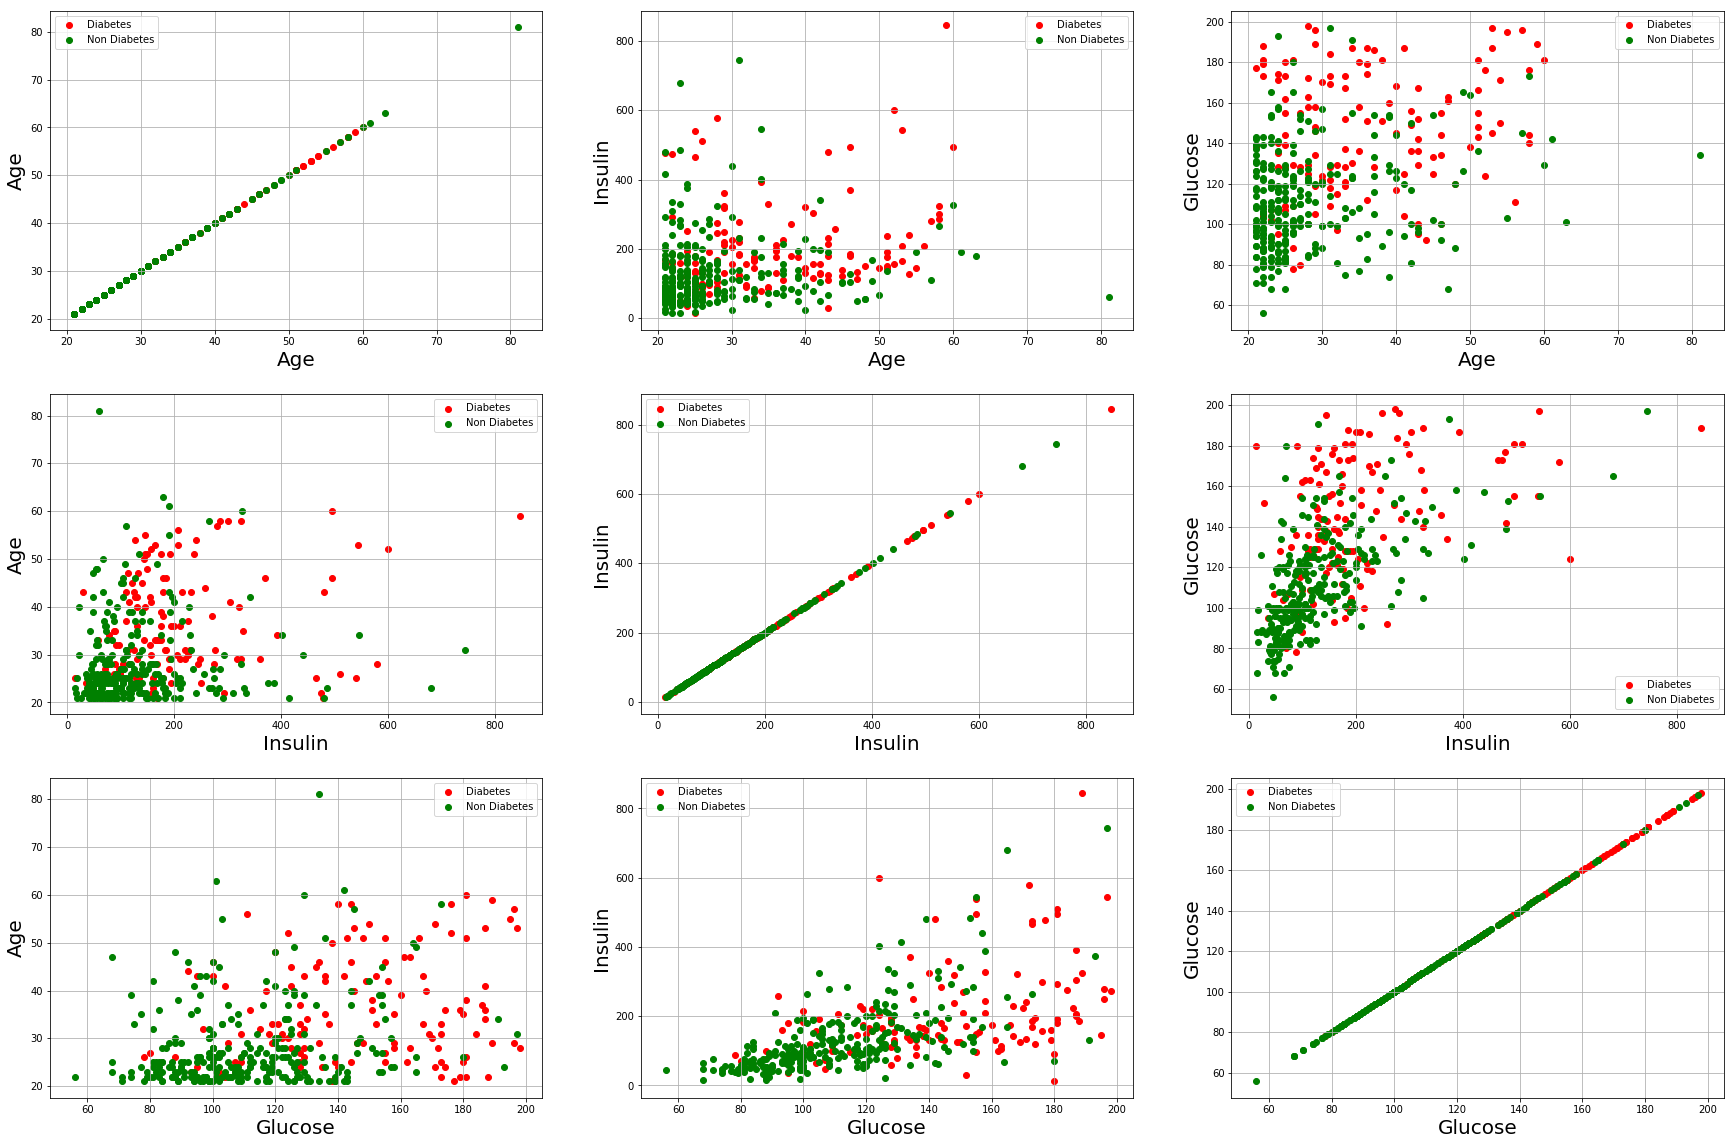

In [9]:
cols = ['Age', 'Insulin', 'Glucose']
# pair wise plot of each feature
plt.figure(figsize=(30, 20))
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3, 3, i*3+j+1)
        plt.scatter(df_diabetes[cols[i]], df_diabetes[cols[j]], color='r', label='Diabetes')
        plt.scatter(df_nondiabetes[cols[i]], df_nondiabetes[cols[j]], color='g', label='Non Diabetes')
        plt.xlabel(cols[i], fontsize=20)
        plt.ylabel(cols[j], fontsize=20)
        plt.legend()
        plt.grid()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics 

## With only two features

In [ ]:
x_cols = ['Age', "Glucose"]
df_new = df[x_cols]
df_new.head()

## Plot how glucose and insulin affects diabetes case at age of 41

In [ ]:
df_41_diabetes = df[(df['Outcome'] == 1) & (df['Age'] == 25)]
df_41_non_diabetes = df[(df['Outcome'] == 0) & (df['Age'] == 25)]

plt.scatter(df_41_diabetes['Glucose'], df_41_diabetes['Insulin'], color='r', label='Diabetes')
plt.scatter(df_41_non_diabetes['Glucose'], df_41_non_diabetes['Insulin'], color='b', label='Non Diabtes')
plt.grid()
plt.legend()
plt.xlabel("Glucose")
plt.ylabel("Insulin")

In [ ]:
plt.figure(figsize=(10, 8))
df[df["Outcome"] == 1]["Age"].value_counts().plot(kind='bar', grid=True)
print("Diabetes Most susceptible at age of", df[df["Outcome"] == 1]["Age"].value_counts().first_valid_index())

In [ ]:
x_cols = ['Age', "Glucose"]
df_new = df[x_cols]
df_new.head()

# using Perceptron Model

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

model = Perceptron(max_iter=1000)
model.fit(df[x_cols], df['Outcome'])
y = model.predict(df[x_cols])
print(model.predict([[43, 114]]))
confusion_matrix(df['Outcome'], y)

In [ ]:
import numpy as np
x_min, x_max = df_new['Age'].min() - 1, df_new['Age'].max() + 1
y_min, y_max = df_new['Glucose'].min() - 1, df_new['Glucose'].max() + 1
print(x_min, x_max, y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.scatter(df_diabetes[['Age']], df_diabetes['Glucose'], color='r', label='Diabetes', edgecolors='black')
plt.scatter(df_nondiabetes[['Age']], df_nondiabetes['Glucose'], color='g', label='Non Diabetes', edgecolors='black')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.grid()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC(kernel="linear")
model.fit(df[x_cols], df['Outcome'])
y = model.predict(df[x_cols])
print(model.predict([[43, 114]]))
confusion_matrix(df['Outcome'], y)

In [ ]:
import numpy as np
x_min, x_max = df_new['Age'].min() - 1, df_new['Age'].max() + 1
y_min, y_max = df_new['Glucose'].min() - 1, df_new['Glucose'].max() + 1
print(x_min, x_max, y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.scatter(df_diabetes[['Age']], df_diabetes['Glucose'], color='r', label='Diabetes', edgecolors='black')
plt.scatter(df_nondiabetes[['Age']], df_nondiabetes['Glucose'], color='g', label='Non Diabetes', edgecolors='black')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.grid()